In [13]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_predictions, plot_decision_boundary


In [14]:


# get dummy data using sklearn datasets 
n_samples = 1000
X, y = make_circles(n_samples=n_samples, shuffle=True, noise=0.02, random_state=42)
len(X), len(y)
print(f"Print first 5 items in X:\n {X[:5]}")
print(f"Print first 5 items in y:\n {y[:5]}")

# from the output , we have 2 features label


Print first 5 items in X:
 [[ 0.76026594  0.22387823]
 [-0.76722217  0.1455425 ]
 [-0.80815854  0.14894355]
 [-0.3760283   0.70320906]
 [ 0.44051035 -0.89761737]]
Print first 5 items in y:
 [1 1 1 1 0]


In [15]:
# make dataframe of circle data
circles = pd.DataFrame({'X1': X[:,0], 
                        'X2': X[:,1], 
                        'label': y})
circles.head(10)


,X1,X2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


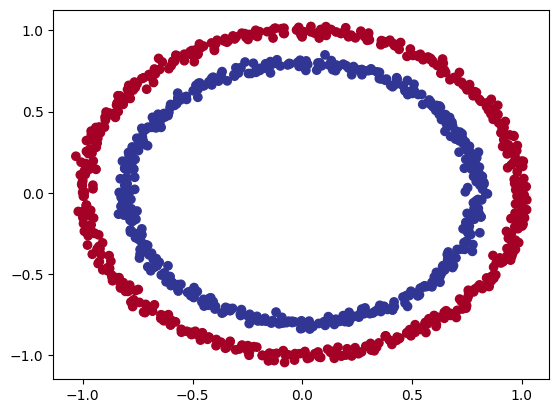

In [16]:
# visualize with matplotlib
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [17]:
X.shape, y.shape

((1000, 2), (1000,))

In [18]:
# turn data to tensor because pytorch requires tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[5], y[5]

(tensor([-0.4845,  0.6606]), tensor(1.))

In [19]:
# split data - the old way
#split = int(0.8*len(X))
#X_train = X[:split]
#y_train = y[:split]
#X_test = X[split:]
#y_test = y[split:]

#len(X_train), len(y_train), len(X_test), len(y_test)

In [20]:
# another way is to use sklearn model selection train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [21]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.linear2 = nn.Linear(in_features=5,
                                 out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linear2(self.linear1(x)) # x-> linear1 -> linear2 -> output

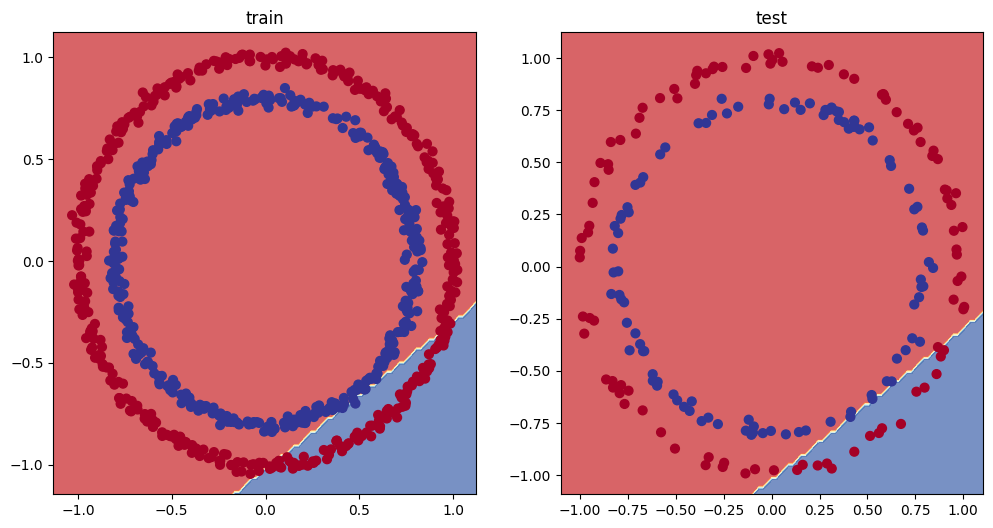

In [22]:
model0 = BinaryClassification()
model0.state_dict()

# graphing
# plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model0, X_test, y_test)

In [23]:
model0 = BinaryClassification()
model0.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.4142, -0.6285],
                      [-0.6557,  0.1395],
                      [-0.1030, -0.4756],
                      [ 0.5338,  0.4048],
                      [ 0.0711,  0.3926]])),
             ('linear1.bias',
              tensor([ 0.5170,  0.2279, -0.0789,  0.4591,  0.5306])),
             ('linear2.weight',
              tensor([[ 0.0231, -0.0593, -0.2402, -0.4408,  0.2265]])),
             ('linear2.bias', tensor([0.0113]))])

In [24]:
model0 = BinaryClassification()
model0.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.4239, -0.4013],
                      [ 0.2705,  0.5684],
                      [-0.1176, -0.0583],
                      [ 0.7067, -0.5957],
                      [-0.2053, -0.0482]])),
             ('linear1.bias',
              tensor([ 0.2166, -0.2874, -0.2192,  0.3055, -0.0151])),
             ('linear2.weight',
              tensor([[ 0.1500, -0.1287, -0.2963,  0.4172,  0.2314]])),
             ('linear2.bias', tensor([0.0075]))])

In [25]:
model0 = BinaryClassification()
model0.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.1305, -0.0083],
                      [ 0.0967, -0.5424],
                      [-0.6187,  0.3130],
                      [ 0.6867,  0.0155],
                      [ 0.1292, -0.6428]])),
             ('linear1.bias',
              tensor([ 0.6776, -0.3533, -0.1625, -0.1425, -0.1859])),
             ('linear2.weight',
              tensor([[ 0.0942, -0.2137,  0.1786,  0.2861,  0.4198]])),
             ('linear2.bias', tensor([0.0045]))])

In [26]:
# loss function: binary cross entropy with sigmoid as activation layer.
loss_fn = torch.nn.BCEWithLogitsLoss() # the output of loss function will be logits

# optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model0.parameters(), lr=0.001)

X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [27]:
# Evaluation Metric.
## Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred))*100
    return acc
    

Train Loss: 0.6946981549263, Accuracy: 50.74999999999999%, Test Loss: 0.6938035488128662, Test Accuracy: 48.0%
Train Loss: 0.6942405104637146, Accuracy: 50.5%, Test Loss: 0.6936690807342529, Test Accuracy: 46.5%
Train Loss: 0.6939094662666321, Accuracy: 50.125%, Test Loss: 0.6936125159263611, Test Accuracy: 48.0%
Train Loss: 0.6936678290367126, Accuracy: 49.875%, Test Loss: 0.6936054825782776, Test Accuracy: 49.5%
Train Loss: 0.6934904456138611, Accuracy: 49.75%, Test Loss: 0.693630039691925, Test Accuracy: 51.5%
Train Loss: 0.6933597326278687, Accuracy: 49.75%, Test Loss: 0.6936743259429932, Test Accuracy: 51.0%
Train Loss: 0.6932631134986877, Accuracy: 49.625%, Test Loss: 0.6937297582626343, Test Accuracy: 52.5%
Train Loss: 0.6931915879249573, Accuracy: 50.0%, Test Loss: 0.6937913298606873, Test Accuracy: 51.5%
Train Loss: 0.6931384205818176, Accuracy: 50.625%, Test Loss: 0.6938549876213074, Test Accuracy: 49.0%
Train Loss: 0.6930989027023315, Accuracy: 51.0%, Test Loss: 0.6939184069

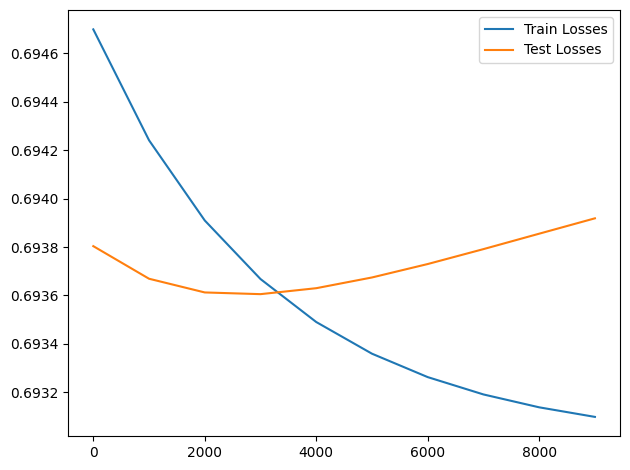

In [28]:
# Train
torch.manual_seed(42)
epochs = 10000
train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
    model0.train() # set model to raining mode
    
    # ---- Forward (train) ----
    
    logits = model0(X_train).squeeze() # squeeze removes a dimension so logits matches y_train
    loss = loss_fn(logits, y_train)      # use logits for BCEWithLogitsLoss: this loss function is more stable
                                        ## BCEWithLogitsLoss expects logits as input compare to BCDLoss which would expect predictions.
    
    y_preds = torch.round(torch.sigmoid(logits)) # to make prediction we manual pass the logits to sigmoid activation function.
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_preds.to(y_train.dtype))

    # ---- Backprop ----
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test
    model0.eval()

    with torch.inference_mode():
        y_test_logits = model0(X_test).squeeze()
        y_test_loss = loss_fn(y_test_logits, y_test)

        y_test_preds = torch.round(torch.sigmoid(y_test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=y_test_preds)
        
        if epoch % 1000 == 0:
            print(f"Train Loss: {loss}, Accuracy: {acc}%, Test Loss: {y_test_loss}, Test Accuracy: {test_acc}%")
            train_losses.append(loss.item())
            test_losses.append(y_test_loss.item())
            epoch_count.append(epoch)


plt.plot(epoch_count, train_losses, label='Train Losses')
plt.plot(epoch_count, test_losses, label='Test Losses')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# The issue with this version is that the accuracy is 51% which is not good.
# see V2

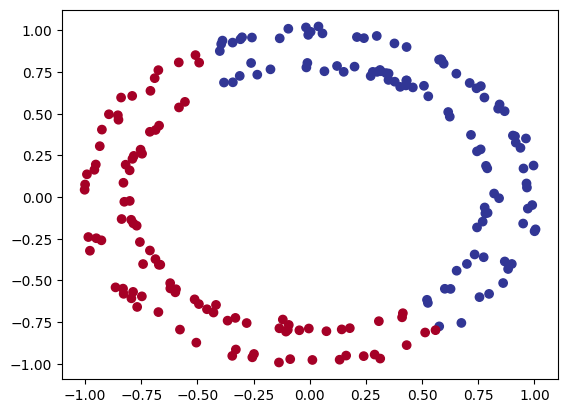

In [49]:
#
model0.eval()
with torch.inference_mode():
    yLogits = model0(X_test)
    y_pred = torch.round(torch.sigmoid(yLogits))
    # visualize with matplotlib
    plt.scatter(x=X_test[:,0],
            y=X_test[:,1],
            c=y_pred,
            cmap=plt.cm.RdYlBu)